Prática de Realce e detecção de borda

Exercícios retirados de: http://homepages.inf.ed.ac.uk/rbf/HIPR2/featops.htm

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

1. Aplique os filtros de realce Sobel e Roberts nas imagens abaixo. Mostre, para o caso do Sobel, uma imagem representando a derivada em x e outra imagem representando a derivada em y

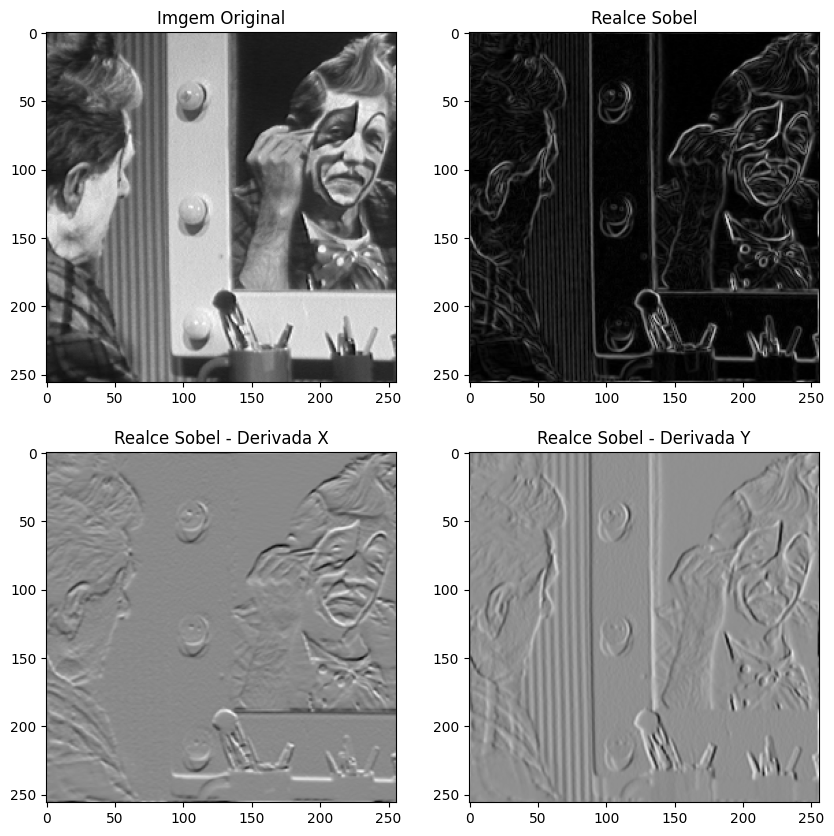

In [50]:
img = cv2.imread("cln1/cln1.png", cv2.IMREAD_GRAYSCALE)
maskY = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])
maskX = np.array([[-1, -2, -1],
                     [0, 0, 0],
                     [1, 2, 1]])

sobelX = convolve2d(img, maskX, mode='same', boundary='wrap')
sobelY = convolve2d(img, maskY, mode='same', boundary='wrap')

sobelGradient = np.sqrt(sobelX**2 + sobelY**2)

def normalize (img):
    imgNormalized = ((img - img.min())/(img.max() - img.min()) * 255).astype(np.uint8)
    return imgNormalized

sobelImg = normalize(sobelGradient)
sobelImgX = normalize(sobelX)
sobelImgY = normalize(sobelY)

f, axarr = plt.subplots(2,2, figsize = (10,10))
axarr[0,0].imshow(img, cmap='gray', vmin=0, vmax=255)
axarr[0,0].title.set_text("Imgem Original")
axarr[0,1].imshow(sobelImg, cmap='gray', vmin=0, vmax=255)
axarr[0,1].title.set_text("Bordas Sobel")
axarr[1,0].imshow(sobelImgX, cmap='gray', vmin=0, vmax=255)
axarr[1,0].title.set_text("Bordas Sobel - Derivada X")
axarr[1,1].imshow(sobelImgY, cmap='gray', vmin=0, vmax=255)
axarr[1,1].title.set_text("Bordas Sobel - Derivada Y")

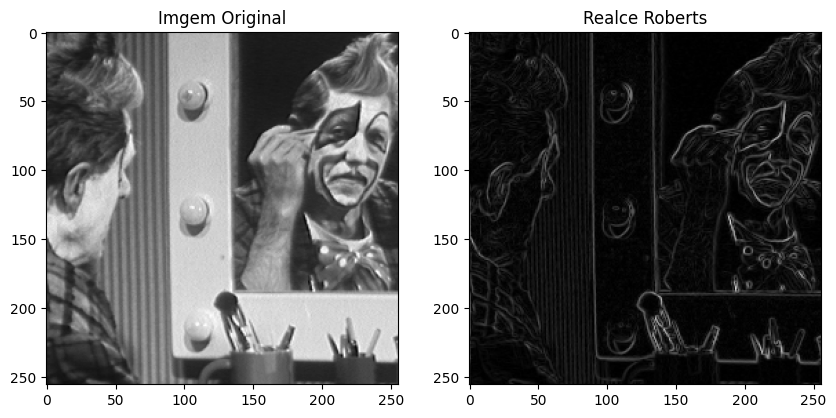

In [61]:
maskH1 = np.array([[1, 0],
                     [0, -1]])
maskH2 = np.array([[0, 1],
                     [-1, 0]])

robertsH1 = convolve2d(img, maskH1, mode='same', boundary='wrap')
robertsH2 = convolve2d(img, maskH2, mode='same', boundary='wrap')

robertsGradient = np.sqrt(robertsH1**2 + robertsH2**2)

def normalize (img):
    imgNormalized = ((img - img.min())/(img.max() - img.min()) * 255).astype(np.uint8)
    return imgNormalized

robertsImg = normalize(robertsGradient)

f, (axarr1, axarr2)  = plt.subplots(1,2, figsize = (10,10))
axarr1.imshow(img, cmap='gray', vmin=0, vmax=255)
axarr1.title.set_text("Imgem Original")
axarr2.imshow(robertsImg, cmap='gray', vmin=0, vmax=255)
axarr2.title.set_text("Bordas Roberts")

2. Utilizando a imagem do exercício anterior, realce as bordas utilizando (a) Filtro Laplaciano. (b) Unsharp masking. (c) Highboost filtering (escolher um k). (d) K <1 para atenuar